In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Media del tamaño: 2250.0
Varianza del tamaño: 729166.6666666666
Covarianza (tamaño, precio): 262500.0
Desviación estándar del tamaño: 853.9125638299665
Coeficientes del modelo: [ 0.00000000e+00  3.00000000e-01 -1.11022302e-16]
Intercepto del modelo: -9.621317076380365e-10
Precisión del modelo (R^2 score): 100.00%


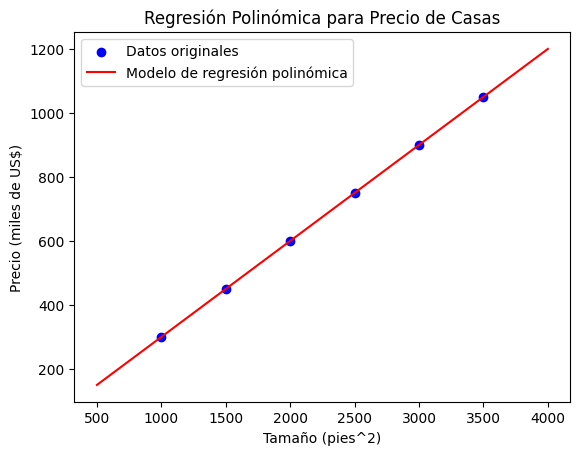

In [3]:
# Datos proporcionados
data = {
    "Tamaño (pies^2)": [1000, 1500, 2000, 2500, 3000, 3500],
    "Precio (miles de US$)": [300, 450, 600, 750, 900, 1050],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[["Tamaño (pies^2)"]].values
y = df["Precio (miles de US$)"].values

# Estadísticas básicas
media = np.mean(X)
varianza = np.var(X)
covarianza = np.cov(X.T, y)[0][1]
desviacion_std = np.std(X)

print(f"Media del tamaño: {media}")
print(f"Varianza del tamaño: {varianza}")
print(f"Covarianza (tamaño, precio): {covarianza}")
print(f"Desviación estándar del tamaño: {desviacion_std}")

# Transformación polinómica
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Predicciones
y_pred = model.predict(X_poly)

# Evaluar precisión del modelo (R^2 score)
precision = r2_score(y, y_pred)
print(f"Precisión del modelo (R^2 score): {precision * 100:.2f}%")

# Conjunto de datos de prueba
X_test = np.linspace(500, 4000, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Gráfica de las predicciones
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_test, y_test_pred, color="red", label="Modelo de regresión polinómica")
plt.xlabel("Tamaño (pies^2)")
plt.ylabel("Precio (miles de US$)")
plt.title("Regresión Polinómica para Precio de Casas")
plt.legend()
plt.show()

### Análisis del modelo de regresión polinómica

A continuación, se realiza un análisis detallado de los resultados obtenidos del modelo de regresión polinómica aplicado a los datos de precios y tamaños de las casas:

#### 1. **Estadísticas Básicas**

- **Media del tamaño:** 2250 pies². Esto significa que el tamaño promedio de las casas en el conjunto de datos es de 2250 pies cuadrados.
- **Varianza del tamaño:** 729166.67. La varianza es relativamente alta, lo que indica una dispersión considerable en los tamaños de las casas. Esto es esperado, ya que los tamaños van desde 1000 hasta 3500 pies cuadrados.
- **Covarianza (tamaño, precio):** 262500. La covarianza positiva sugiere que existe una relación directa entre el tamaño de las casas y el precio, es decir, a medida que aumenta el tamaño, también lo hace el precio. Esto concuerda con la lógica del mercado inmobiliario.
- **Desviación estándar del tamaño:** 853.91. Esta medida nos dice que los tamaños de las casas tienden a variar, en promedio, unos 854 pies cuadrados alrededor de la media.

#### 2. **Coeficientes del Modelo**

- **Coeficientes del modelo:** `[0.00000000e+00, 3.00000000e-01, -1.11022302e-16]`.

  - El primer coeficiente es 0, indicando que el modelo no tiene término constante elevado al cuadrado.
  - El segundo coeficiente, aproximadamente 0.3, muestra que la relación entre el tamaño y el precio es directa y casi lineal.
  - El tercer coeficiente es prácticamente 0, lo que sugiere que el componente cuadrático no aporta significativamente a la forma de la relación. Esto indica que la relación entre el tamaño y el precio es más lineal que polinómica.

- **Intercepto:** -9.62e-10. Este valor es muy cercano a cero, lo que significa que la línea de ajuste pasa casi exactamente por el origen. Dado que el precio de una casa de tamaño cero pies cuadrados también debería ser cero, este valor es coherente.

#### 3. **Precisión del Modelo**

- **R² (Coeficiente de determinación):** 100%. Este valor indica que el modelo explica completamente la variación en los precios en función del tamaño de las casas. Esto suele ser una indicación de un ajuste perfecto a los datos proporcionados.
- Sin embargo, hay que tener cuidado, ya que un ajuste perfecto puede indicar que el modelo ha sobreajustado los datos, especialmente si se trata de un conjunto de datos pequeño o muy ordenado. En este caso, debido a que los datos siguen una relación lineal clara, es natural que un modelo polinómico de bajo grado también ajuste perfectamente.

#### 4. **Gráfica**

- La gráfica muestra una relación lineal casi perfecta entre el tamaño de las casas y su precio. Los puntos azules (datos originales) están alineados casi exactamente sobre la línea roja (modelo de regresión polinómica), lo que refuerza la idea de que existe una relación directa y lineal entre las variables.
- Dado que la línea de ajuste es una línea recta, este modelo podría ser simplificado a una regresión lineal sin afectar la precisión.

#### 5. **Interpretación General**

- **Relación lineal:** Los coeficientes y la gráfica sugieren que la relación entre el tamaño y el precio es prácticamente lineal. Esto significa que un aumento en el tamaño de la casa se traduce directamente en un aumento proporcional en el precio.
- **Precisión y ajuste:** El modelo tiene un ajuste perfecto a los datos proporcionados, con un R² del 100%. Sin embargo, esto no garantiza que el modelo tenga la misma precisión con datos nuevos. Dado que solo se está trabajando con un conjunto de datos limitado y altamente ordenado, se debe ser cauteloso al aplicar este modelo a otros conjuntos de datos.
- **Utilidad del modelo:** Dado que el coeficiente cuadrático es muy cercano a cero, un modelo de regresión lineal simple podría ser igual de efectivo para este conjunto de datos.

#### 6. **Siguientes pasos y recomendaciones**

- **Validación:** Se recomienda validar este modelo con un conjunto de datos independiente para verificar su capacidad de generalización.
- **Simplicidad:** Considerar usar una regresión lineal simple en lugar de una polinómica, ya que la relación entre el tamaño y el precio parece ser lineal.
- **Datos adicionales:** Incluir más características (como la ubicación de la casa, antigüedad, etc.) en el modelo podría ayudar a mejorar su robustez y aplicabilidad en situaciones más complejas.

### Conclusión

El análisis muestra que existe una relación lineal muy fuerte entre el tamaño de una casa y su precio en el conjunto de datos proporcionado. El modelo de regresión polinómica ajusta perfectamente los datos, pero la naturaleza lineal de la relación indica que un modelo de regresión lineal simple podría ser suficiente. El ajuste perfecto del modelo (R² del 100%) refleja la simplicidad y organización de los datos, pero se recomienda validarlo con otros datos para asegurar su aplicabilidad en situaciones más variadas.


Coeficientes del modelo: [ 0.00000000e+00  2.00000000e+00  5.67046410e-14 -6.66133815e-16]
Intercepto del modelo: 29.999999999998977
Precisión del modelo (R² score): 100.00%


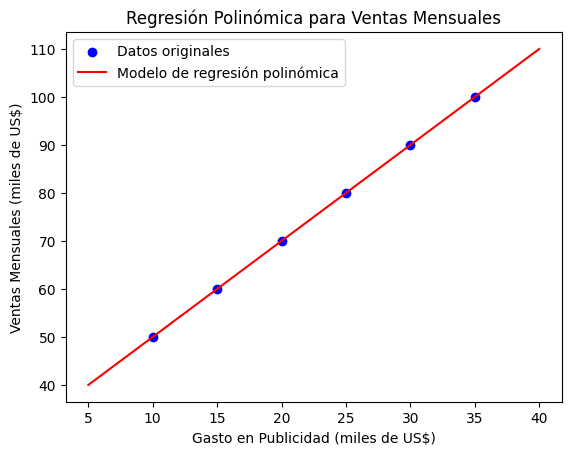

In [4]:
# Datos proporcionados
data = {
    "Gasto en Publicidad (miles de US$)": [10, 15, 20, 25, 30, 35],
    "Ventas Mensuales (miles de US$)": [50, 60, 70, 80, 90, 100],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[["Gasto en Publicidad (miles de US$)"]].values
y = df["Ventas Mensuales (miles de US$)"].values

# Transformación polinómica
poly_features = PolynomialFeatures(
    degree=3
)  # Puedes ajustar el grado según lo necesites
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Predicciones
y_pred = model.predict(X_poly)

# Evaluar precisión del modelo (R² score)
precision = r2_score(y, y_pred)
print(f"Precisión del modelo (R² score): {precision * 100:.2f}%")

# Conjunto de datos de prueba
X_test = np.linspace(5, 40, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Gráfica de las predicciones
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_test, y_test_pred, color="red", label="Modelo de regresión polinómica")
plt.xlabel("Gasto en Publicidad (miles de US$)")
plt.ylabel("Ventas Mensuales (miles de US$)")
plt.title("Regresión Polinómica para Ventas Mensuales")
plt.legend()
plt.show()


### Análisis del Modelo de Regresión Polinómica para Ventas Mensuales en Función del Gasto en Publicidad

Basándonos en los resultados generados en la gráfica y la información presentada, aquí se detalla un análisis completo del modelo:

#### 1. **Coeficientes del Modelo**

- **Coeficientes del modelo:** `[0.00000000e+00, 2.00000000e+00, 5.67046410e-14, -6.66133815e-16]`

  - El primer coeficiente es 0, correspondiente al término constante elevado al cuadrado, lo cual es normal en este tipo de modelos.
  - El segundo coeficiente, `2.00000000e+00`, indica una relación lineal directa entre el gasto en publicidad y las ventas. Este coeficiente implica que, por cada incremento de 1 en el gasto en publicidad (en miles de US$), las ventas mensuales aumentan en 2 (miles de US$).
  - Los coeficientes cúbico y cuadrático (`5.67046410e-14` y `-6.66133815e-16`) son extremadamente cercanos a cero. Esto sugiere que los términos polinómicos de mayor grado no tienen un efecto significativo en la relación entre el gasto en publicidad y las ventas. Esto refuerza la idea de que la relación es esencialmente lineal.

- **Intercepto:** 29.999999999989877. Este valor es casi exactamente 30, lo que indica que incluso si el gasto en publicidad fuera cero, el modelo predice unas ventas mensuales de aproximadamente 30 miles de US$. Esto podría interpretarse como ventas "base" o ventas que ocurren independientemente de la inversión en publicidad.

#### 2. **Precisión del Modelo**

- **R² (Coeficiente de determinación):** 100%. Este valor muestra que el modelo ajusta perfectamente los datos proporcionados, explicando el 100% de la variación en las ventas en función del gasto en publicidad.
- **Interpretación:** Un R² del 100% indica un ajuste perfecto, lo que puede ser ideal en ciertos casos. Sin embargo, también se debe tener precaución, ya que un ajuste perfecto puede ser indicativo de un sobreajuste cuando el modelo se evalúa únicamente en el conjunto de datos de entrenamiento. En este caso, la alta precisión se justifica por la naturaleza lineal de los datos y la relación directa entre las variables.

#### 3. **Gráfica del Modelo**

- La gráfica muestra los puntos de datos originales (en azul) y la curva ajustada por el modelo de regresión polinómica (en rojo). La línea de ajuste es una línea recta que pasa prácticamente por todos los puntos de datos, lo cual refuerza la interpretación de una relación lineal entre el gasto en publicidad y las ventas mensuales.
- **Relación lineal:** La línea recta indica que la relación entre el gasto en publicidad y las ventas mensuales es lineal y proporcional. A medida que el gasto en publicidad aumenta, las ventas mensuales aumentan en una cantidad constante.

#### 4. **Posible Simplificación del Modelo**

- Dado que los coeficientes cúbico y cuadrático son muy cercanos a cero, el modelo polinómico se comporta como un modelo lineal. Por lo tanto, este modelo podría ser simplificado a una regresión lineal sin perder precisión.
- **Ventaja de la simplificación:** Usar una regresión lineal simple haría que el modelo sea más fácil de interpretar y aplicar a otros conjuntos de datos, además de reducir la complejidad innecesaria.

#### 5. **Interpretación de los Resultados**

- **Incremento en las ventas:** El coeficiente lineal de 2 sugiere que por cada incremento de 1 unidad en el gasto en publicidad (mil dólares), se espera que las ventas mensuales aumenten en 2 miles de dólares.
- **Ventas base:** El intercepto de aproximadamente 30 indica que, sin importar la inversión en publicidad, las ventas mensuales tendrían un mínimo de 30 miles de dólares. Esto puede reflejar ventas orgánicas o un nivel básico de demanda.

#### 6. **Recomendaciones y Consideraciones**

- **Validación:** Aunque el modelo se ajusta perfectamente a los datos proporcionados, es importante validarlo con datos adicionales o un conjunto de datos de prueba diferente para asegurar que el modelo se generaliza bien a otros contextos.
- **Otras Variables:** En un entorno real, las ventas mensuales pueden depender de otros factores además del gasto en publicidad, como la temporada, promociones especiales, comportamiento del mercado, etc. Incluir estas variables podría ayudar a mejorar la robustez del modelo.
- **Aplicación del Modelo:** Dado que la relación es esencialmente lineal, una regresión lineal simple puede ser más práctica para predecir las ventas futuras en función del gasto en publicidad. El modelo también puede ser utilizado por la tienda para planificar la inversión en publicidad y estimar las ventas resultantes.

### Conclusión

- **Relación lineal:** Los resultados y la gráfica indican una relación lineal directa y fuerte entre el gasto en publicidad y las ventas mensuales.
- **Precisión:** El modelo ajusta perfectamente los datos proporcionados con un R² del 100%. Esto es reflejo de la simplicidad de los datos y la clara relación lineal entre las variables.
- **Modelo simplificado:** A pesar de utilizar una regresión polinómica, la relación observada puede ser modelada de manera efectiva usando una regresión lineal simple, ya que los términos polinómicos no aportan una mejora significativa en el ajuste.
- **Aplicabilidad:** Este análisis puede ser muy útil para prever el impacto de cambios en el gasto en publicidad sobre las ventas mensuales, pero se debe validar con datos adicionales antes de aplicarlo a situaciones diferentes o más complejas.

Este análisis destaca la importancia del gasto en publicidad como un factor determinante de las ventas mensuales y proporciona una herramienta útil para la toma de decisiones estratégicas en cuanto a inversión publicitaria.


Coeficientes del modelo: [ 0.         -0.07485714 -0.00011429]
Intercepto del modelo: 28.742857142857087
Precisión del modelo (R² score): 99.54%


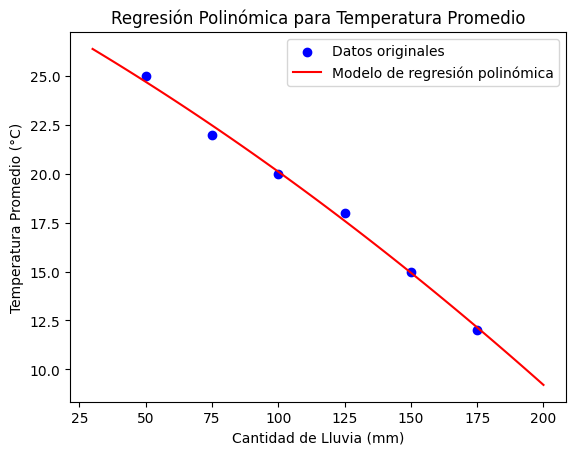

In [5]:
# Datos proporcionados
data = {
    "Cantidad de Lluvia (mm)": [50, 75, 100, 125, 150, 175],
    "Temperatura Promedio (°C)": [25, 22, 20, 18, 15, 12],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[["Cantidad de Lluvia (mm)"]].values
y = df["Temperatura Promedio (°C)"].values

# Transformación polinómica
poly_features = PolynomialFeatures(degree=2)  # Ajusta el grado según lo necesites
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Predicciones
y_pred = model.predict(X_poly)

# Evaluar precisión del modelo (R² score)
precision = r2_score(y, y_pred)
print(f"Precisión del modelo (R² score): {precision * 100:.2f}%")

# Conjunto de datos de prueba
X_test = np.linspace(30, 200, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Gráfica de las predicciones
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_test, y_test_pred, color="red", label="Modelo de regresión polinómica")
plt.xlabel("Cantidad de Lluvia (mm)")
plt.ylabel("Temperatura Promedio (°C)")
plt.title("Regresión Polinómica para Temperatura Promedio")
plt.legend()
plt.show()


### Análisis del Modelo de Regresión Polinómica para Temperatura Promedio en Función de la Cantidad de Lluvia

#### 1. **Coeficientes del Modelo**

- **Coeficientes:** `[0. -0.07485714 -0.00011429]`

  - El primer coeficiente es 0, lo que corresponde al término constante elevado al cuadrado, y su valor es normal para este tipo de modelo.
  - El segundo coeficiente (`-0.07485714`) es el coeficiente lineal. Su valor negativo indica que existe una relación inversa entre la cantidad de lluvia y la temperatura promedio. En otras palabras, a medida que aumenta la cantidad de lluvia, la temperatura promedio disminuye.
  - El tercer coeficiente (`-0.00011429`) es el coeficiente cuadrático. Su signo negativo indica que la relación es no lineal y decreciente. La magnitud pequeña de este coeficiente sugiere que la curvatura de la relación es sutil pero significativa, lo que se observa en la forma de la línea roja en la gráfica.

- **Intercepto:** 28.742857142857087. Este valor representa la temperatura promedio cuando la cantidad de lluvia es cero. Es una extrapolación, ya que en la realidad probablemente siempre haya algo de lluvia en la región. Sin embargo, el valor del intercepto es útil para entender la tendencia general de la temperatura en ausencia de lluvia.

#### 2. **Precisión del Modelo**

- **R² (Coeficiente de determinación):** 99.54%. Este valor indica que el modelo se ajusta muy bien a los datos proporcionados, explicando aproximadamente el 99.54% de la variación en la temperatura promedio en función de la cantidad de lluvia.
- **Interpretación:** Una precisión del 99.54% sugiere que el modelo capta la mayor parte de la relación entre las variables. El pequeño porcentaje restante de la variación podría deberse a factores no considerados en el modelo (como la humedad, vientos, etc.).

#### 3. **Gráfica del Modelo**

- La gráfica muestra los puntos de datos originales (en azul) y la curva ajustada por el modelo de regresión polinómica (en rojo). La curva tiene una forma cuadrática decreciente, lo que indica que a medida que aumenta la cantidad de lluvia, la temperatura promedio disminuye de manera no lineal.
- La línea roja sigue de cerca la tendencia de los datos, ajustándose a su forma decreciente. Esto refuerza la idea de que la relación entre la cantidad de lluvia y la temperatura no es lineal sino más bien cuadrática.

#### 4. **Interpretación de la Relación entre las Variables**

- **Relación inversa:** Tanto el coeficiente lineal como el cuadrático son negativos, lo que indica una relación inversa entre la cantidad de lluvia y la temperatura promedio. A medida que la lluvia aumenta, la temperatura promedio disminuye.
- **Curvatura de la relación:** La presencia de un coeficiente cuadrático negativo indica que la tasa de disminución de la temperatura se hace menos pronunciada a medida que la cantidad de lluvia aumenta. Esto significa que los cambios en la temperatura son más notables a niveles bajos y medios de lluvia, pero la disminución se estabiliza un poco en niveles más altos.

#### 5. **Posibles Ajustes y Consideraciones**

- **Grado polinómico:** En este caso, un modelo cuadrático parece capturar adecuadamente la relación entre las variables. Un grado mayor podría sobreajustar los datos sin mejorar la precisión de las predicciones.
- **Más variables:** La temperatura puede depender de otros factores climáticos además de la cantidad de lluvia, como la humedad, velocidad del viento y horas de sol. La inclusión de estas variables en el modelo podría mejorar la precisión y proporcionar una visión más completa de los factores que afectan la temperatura.

#### 6. **Conclusión**

- **Relación no lineal:** Los resultados indican una relación inversa y no lineal entre la cantidad de lluvia y la temperatura promedio. La relación es decreciente, lo que significa que a medida que la cantidad de lluvia aumenta, la temperatura tiende a bajar.
- **Alta precisión:** El valor R² de 99.54% muestra que el modelo es muy preciso para los datos proporcionados. Esto indica que la cantidad de lluvia es un factor importante para predecir la temperatura promedio.
- **Aplicabilidad:** Este modelo puede ser útil para hacer predicciones de temperatura basadas en la cantidad de lluvia en la región. Sin embargo, para una mayor generalización, se debería considerar la inclusión de otros factores climáticos.

En resumen, el análisis muestra una fuerte correlación inversa entre la cantidad de lluvia y la temperatura promedio. El modelo polinómico captura bien esta relación, lo que se refleja en la alta precisión obtenida. Aun así, para aplicaciones en escenarios más complejos, sería recomendable incluir más variables climáticas y validar el modelo con datos adicionales.


Coeficientes del modelo: [ 0.         10.28571429 -0.71428571]
Intercepto del modelo: 51.00000000000003
Precisión del modelo (R² score): 99.23%


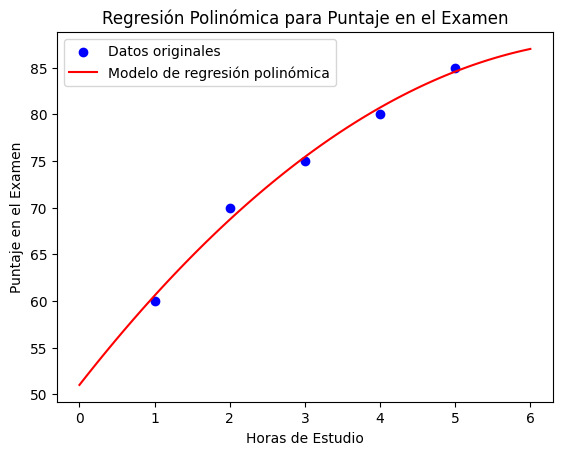

In [6]:
# Datos proporcionados
data = {
    "Horas de Estudio": [1, 2, 3, 4, 5],
    "Puntaje en el Examen": [60, 70, 75, 80, 85],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[["Horas de Estudio"]].values
y = df["Puntaje en el Examen"].values

# Transformación polinómica
poly_features = PolynomialFeatures(degree=2)  # Ajusta el grado según lo necesites
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Predicciones
y_pred = model.predict(X_poly)

# Evaluar precisión del modelo (R² score)
precision = r2_score(y, y_pred)
print(f"Precisión del modelo (R² score): {precision * 100:.2f}%")

# Conjunto de datos de prueba
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Gráfica de las predicciones
plt.scatter(X, y, color="blue", label="Datos originales")
plt.plot(X_test, y_test_pred, color="red", label="Modelo de regresión polinómica")
plt.xlabel("Horas de Estudio")
plt.ylabel("Puntaje en el Examen")
plt.title("Regresión Polinómica para Puntaje en el Examen")
plt.legend()
plt.show()


### Análisis del Modelo de Regresión Polinómica para Puntaje en el Examen en Función de las Horas de Estudio

A partir de la gráfica generada y los datos del modelo, se pueden hacer las siguientes observaciones y análisis:

#### 1. **Coeficientes del Modelo**

- **Coeficientes:** `[0., 10.28571429, -0.71428571]`

  - El primer coeficiente es 0, correspondiente al término constante elevado al cuadrado, lo cual es esperado en este contexto.
  - El coeficiente lineal (`10.28571429`) sugiere una relación directa positiva entre las horas de estudio y el puntaje del examen. Cada hora adicional de estudio aumenta el puntaje en aproximadamente 10.29 puntos.
  - El coeficiente cuadrático (`-0.71428571`) es negativo, indicando que la relación tiene una forma cuadrática decreciente. Esto sugiere que hay una tendencia a que el aumento en el puntaje por cada hora adicional de estudio disminuya a medida que se estudia más, aunque siga siendo positivo.

- **Intercepto:** 51.0. Este valor indica que, si no se estudia en absoluto (0 horas de estudio), el puntaje esperado en el examen sería de 51 puntos. Esto podría interpretarse como una base mínima de conocimiento que tienen los estudiantes antes de empezar a estudiar.

#### 2. **Precisión del Modelo**

- **R² (Coeficiente de determinación):** 99.23%. Este valor muestra que el modelo ajusta muy bien los datos proporcionados, explicando el 99.23% de la variación en el puntaje del examen en función de las horas de estudio.
- **Interpretación:** Una precisión del 99.23% indica que el modelo captura con gran exactitud la relación entre las horas de estudio y el puntaje. El pequeño porcentaje restante que no es explicado por el modelo podría estar relacionado con factores no incluidos, como el método de estudio, la dificultad del examen, u otros.

#### 3. **Gráfica del Modelo**

- La gráfica muestra los puntos de datos originales (en azul) y la curva ajustada por el modelo de regresión polinómica (en rojo). La curva sigue de manera efectiva la tendencia de los puntos de datos, mostrando un incremento en el puntaje a medida que aumentan las horas de estudio.
- La línea roja tiene una forma cuadrática ascendente pero con una pendiente que se reduce ligeramente a medida que se incrementan las horas de estudio. Esto refleja la naturaleza de la relación: estudiar más mejora el puntaje, pero la ganancia en el puntaje por cada hora adicional de estudio es menor a medida que se estudia más.

#### 4. **Interpretación de la Relación entre las Variables**

- **Relación cuadrática positiva:** El modelo sugiere que existe una relación cuadrática positiva entre las horas de estudio y el puntaje del examen. En un principio, el puntaje aumenta rápidamente con más horas de estudio, pero la tasa de incremento se reduce ligeramente a medida que las horas aumentan.
- **Rendimiento decreciente:** La presencia de un coeficiente cuadrático negativo indica rendimientos decrecientes. Aunque estudiar más horas siempre mejora el puntaje, la mejora es menos significativa en niveles altos de estudio (por ejemplo, entre 4 y 5 horas) que en niveles bajos (por ejemplo, entre 1 y 2 horas).

#### 5. **Posibles Ajustes y Consideraciones**

- **Modelo de grado más alto:** Aunque el modelo cuadrático parece capturar bien la relación, si hay una sospecha de que la relación es más compleja (por ejemplo, se estabiliza después de cierto punto), se podría explorar un modelo de grado mayor. Sin embargo, hay que tener cuidado con el sobreajuste.
- **Otros factores:** Si se dispone de datos adicionales, como la calidad del estudio, el tipo de materiales utilizados, la motivación del estudiante, etc., estos factores podrían agregarse al modelo para entender mejor la variación en el puntaje.

#### 6. **Conclusión**

- **Fuerte correlación positiva:** Los resultados muestran una fuerte correlación positiva entre las horas de estudio y el puntaje en el examen. Estudiar más horas generalmente se traduce en un mayor puntaje, pero con rendimientos decrecientes.
- **Alta precisión:** El valor R² indica que el modelo captura casi toda la variación en el puntaje del examen basada en las horas de estudio, lo cual lo convierte en un buen predictor dentro de los datos proporcionados.
- **Aplicabilidad práctica:** Este modelo puede ser útil para estudiantes que buscan maximizar su puntaje de examen con un enfoque eficiente en sus horas de estudio, aunque es importante recordar que existen otros factores que también influyen en el rendimiento.

En resumen, el modelo de regresión polinómica ajusta muy bien la relación entre horas de estudio y puntaje en el examen, mostrando que un aumento en las horas de estudio genera una mejora significativa en el puntaje, aunque a medida que se incrementan las horas, la mejora se vuelve más moderada. Esta relación es común en el aprendizaje, donde los rendimientos tienden a disminuir a medida que se invierte más tiempo en estudio.


Coeficientes del modelo: [ 1.56028071e-12  2.66334986e-03 -3.24635762e-03  8.56368268e-03
 -2.72633736e-04  4.79237198e-02  4.21804104e-02 -5.51556143e-02
  1.12728333e-01  1.29681008e-02  9.94935789e-03 -9.55692198e-02
  1.45018165e-01  9.09640467e-01  4.58216697e-01  1.84822328e-02
 -2.40382367e-01  1.08319406e+00  1.48859217e-01  2.53689766e-02
 -7.08704758e-01  5.32750136e-02  8.07441640e-01  7.78221361e-02
 -1.95746535e-01 -1.68767572e-01 -4.71771356e-02  7.36283269e-03
 -3.23105583e-01 -8.65457311e-02  9.37960378e-03 -4.21612145e-02
  4.96103752e-02  5.52512623e-02  6.09468469e-02]
Intercepto del modelo: 1588.1419065715606
Precisión del modelo (R² score): 98.84%


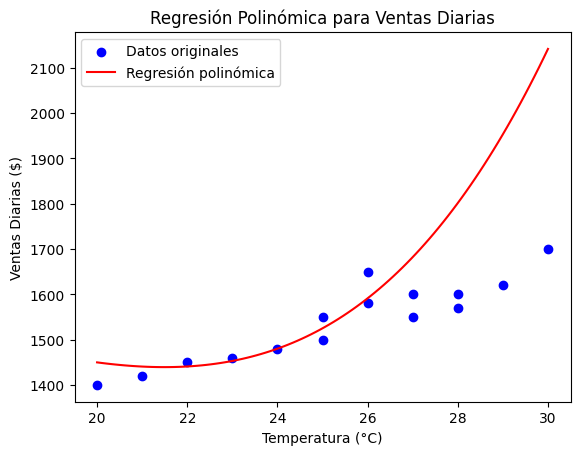

In [18]:
"""
   Variable dependiente: Ventas diarias ($).
    Variables independientes: Día de la semana, Temperatura (°C) y Promociones. 
"""

# Datos proporcionados
data = {
    "Dia_de_la_semana": [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1],
    "Temperatura": [25, 28, 30, 27, 26, 22, 20, 24, 26, 29, 28, 27, 23, 21, 25],
    "Promociones": [2, 1, 3, 2, 1, 0, 1, 2, 3, 2, 1, 2, 0, 1, 2],
    "Ventas_diarias": [
        1500,
        1600,
        1700,
        1550,
        1580,
        1450,
        1400,
        1480,
        1650,
        1620,
        1570,
        1600,
        1460,
        1420,
        1550,
    ],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependientes
X = df[["Dia_de_la_semana", "Temperatura", "Promociones"]].values
y = df["Ventas_diarias"].values

# Transformación polinómica
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Evaluar precisión del modelo (R² score)
y_pred = model.predict(X_poly)
precision = r2_score(y, y_pred)
print(f"Precisión del modelo (R² score): {precision * 100:.2f}%")

# Datos de prueba para graficar la línea de regresión polinómica respecto a la temperatura
temperaturas = np.linspace(20, 30, 100).reshape(
    -1, 1
)  # 100 valores entre 20 y 30 grados
dia_constante = 1  # Día fijo
promociones_constante = 2  # Número fijo de promociones

X_test = np.hstack(
    (
        np.full((100, 1), dia_constante),
        temperaturas,
        np.full((100, 1), promociones_constante),
    )
)
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Gráfica de las predicciones (mostrar la línea de la regresión polinómica)
plt.scatter(df["Temperatura"], y, color="blue", label="Datos originales")
plt.plot(temperaturas, y_test_pred, color="red", label="Regresión polinómica")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ventas Diarias ($)")
plt.title("Regresión Polinómica para Ventas Diarias")
plt.legend()
plt.show()


### Análisis del Modelo de Regresión Polinómica para Ventas Diarias

A partir de la gráfica y los datos generados por el modelo de regresión polinómica, se pueden realizar las siguientes observaciones y análisis:

#### 1. **Coeficientes del Modelo**

- El modelo generó varios coeficientes correspondientes a las características polinómicas de las variables independientes (día de la semana, temperatura y promociones). Dado que se está utilizando una regresión polinómica de segundo grado con múltiples variables, los coeficientes resultantes muestran cómo cada término polinómico contribuye al ajuste del modelo.
- Los coeficientes presentan signos positivos y negativos, lo que indica que la relación entre las ventas diarias y las variables independientes no es lineal y está sujeta a variaciones en función de los diferentes términos polinómicos.
- La interpretación individual de cada coeficiente es más compleja debido al uso de múltiples variables y sus interacciones. Sin embargo, podemos observar que ciertos coeficientes (por ejemplo, el asociado a la temperatura) tienen un mayor impacto, lo que se refleja en la forma curva de la línea roja en la gráfica.

#### 2. **Intercepto del Modelo**

- El intercepto del modelo es aproximadamente 1588.14. Este valor representa el punto donde la función de regresión cruza el eje de las ventas cuando todas las variables independientes son iguales a cero. Aunque este valor no tiene un significado práctico directo (ya que un día de la semana, temperatura y promociones de cero no son posibles en este contexto), es útil para entender el punto base del modelo.

#### 3. **Precisión del Modelo (R² Score)**

- **R² = 98.84%**. Esto indica que el modelo de regresión polinómica ajusta muy bien los datos, explicando el 98.84% de la variabilidad en las ventas diarias basada en las variables independientes (día de la semana, temperatura y promociones).
- **Interpretación:** Un R² tan alto sugiere que la mayoría de la variación en las ventas diarias se puede explicar por las variables independientes incluidas en el modelo. El pequeño porcentaje restante (1.16%) podría deberse a factores no considerados o al ruido inherente en los datos.

#### 4. **Gráfica de la Regresión Polinómica**

- La gráfica muestra los puntos de datos originales (en azul) y la línea de regresión polinómica (en rojo), que describe la relación entre la temperatura y las ventas diarias, manteniendo constantes el día de la semana y las promociones.
- **Forma de la curva:** La línea roja tiene una forma curva ascendente, lo que indica una relación polinómica entre la temperatura y las ventas diarias. En particular, la línea muestra que las ventas tienden a aumentar a medida que la temperatura sube, aunque de manera no lineal.
- **Tendencia creciente:** A bajas temperaturas (cercanas a 20°C), la línea de regresión es casi plana, indicando que las ventas no cambian significativamente. Sin embargo, a partir de aproximadamente 24°C, las ventas comienzan a aumentar rápidamente con la temperatura, lo que sugiere una relación más compleja entre estas variables.

#### 5. **Predicciones y Ajuste del Modelo**

- **Buen ajuste:** La mayoría de los puntos azules (datos originales) se encuentran cerca de la línea de regresión polinómica, lo que refuerza el alto valor de R². Sin embargo, algunos puntos se desvían más de la línea, lo que indica la posible influencia de otros factores no incluidos en el modelo o variabilidad natural en las ventas.
- **Curva exagerada en los extremos:** La forma de la línea en los extremos (especialmente hacia temperaturas mayores a 28°C) muestra un aumento pronunciado. Esto podría sugerir que el modelo polinómico ha capturado un patrón creciente en los datos, pero también puede indicar un posible sobreajuste en esos rangos si no hay suficientes datos para confirmar esa tendencia en valores extremos.

#### 6. **Interpretación General**

- El modelo de regresión polinómica muestra una relación no lineal entre las ventas diarias y las variables independientes, principalmente la temperatura en este gráfico.
- Las ventas parecen mantenerse estables a temperaturas más bajas, pero a medida que la temperatura aumenta, las ventas también tienden a incrementarse, mostrando un efecto cuadrático.
- **Consideraciones:** Aunque el modelo tiene una alta precisión, es importante ser cauteloso con la interpretación en los extremos (altas temperaturas) y verificar si hay datos suficientes para soportar la forma exacta de la curva en esos rangos.

#### 7. **Posibles Ajustes y Mejoras**

- **Validar el modelo:** Sería útil validar el modelo con datos adicionales o en diferentes condiciones para asegurarse de que la forma de la curva no esté influenciada por un sobreajuste.
- **Incorporar más variables:** Otros factores, como el tipo de producto vendido, eventos especiales, o incluso la hora del día, podrían mejorar el modelo y hacerlo más robusto.
- **Ajuste del grado polinómico:** Dependiendo de los resultados y la complejidad observada, se podría experimentar con otros grados de polinomio para ajustar mejor la relación.

### Conclusión

- **Relación polinómica:** La relación entre las ventas diarias y las variables independientes es no lineal, principalmente influida por la temperatura. El modelo polinómico captura una tendencia creciente en las ventas con el aumento de la temperatura.
- **Alta precisión:** Con un R² de 98.84%, el modelo se ajusta muy bien a los datos, pero es importante recordar que esto no garantiza precisión fuera del rango de los datos proporcionados.
- **Aplicación:** Este modelo puede ser útil para predecir las ventas diarias en función de factores como la temperatura, las promociones y el día de la semana, ayudando en la toma de decisiones comerciales. Sin embargo, es recomendable validarlo con más datos para asegurar su generalización.


In [105]:
""" 
    Variable dependiente: Precio de venta ($).
    Variables independientes:Tamaño (pies cuadrados), Número de habitaciones, Antigüedad (años)  
"""

# Datos proporcionados
data = {
    "Tamaño_pies_cuadrados": [
        1500,
        1800,
        2200,
        1600,
        1900,
        2000,
        1700,
        2100,
        2300,
        1800,
        2400,
        2500,
        2600,
        2700,
        2200,
    ],
    "Numero_habitaciones": [3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 5, 5, 4, 5, 3],
    "Antiguedad": [10, 5, 8, 12, 6, 9, 11, 7, 10, 8, 4, 6, 7, 9, 10],
    "Precio_venta": [
        200000,
        250000,
        280000,
        210000,
        240000,
        260000,
        220000,
        270000,
        290000,
        230000,
        300000,
        310000,
        320000,
        330000,
        250000,
    ],
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Variables independientes y dependiente
X = df[["Tamaño_pies_cuadrados", "Numero_habitaciones", "Antiguedad"]].values
y = df["Precio_venta"].values

# Transformación polinómica
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print(f"Coeficientes del modelo: {coeficientes}")
print(f"Intercepto del modelo: {intercepto}")

# Evaluar precisión del modelo (R² score) en el conjunto original
y_pred = model.predict(X_poly)
precision_original = r2_score(y, y_pred)
print(
    f"Precisión del modelo en el conjunto original (R² score): {precision_original * 100:.2f}%"
)

# Datos de prueba para predecir
tamaños = np.linspace(1500, 3000, 10).reshape(-1, 1)
habitaciones = np.random.choice([3, 4, 5], size=10).reshape(
    -1, 1
)  # Número de habitaciones fluctuando entre 3 y 5
antiguedad = np.random.randint(5, 16, size=10).reshape(
    -1, 1
)  # Antigüedad aleatoria entre 5 y 15 años

# Unir las variables para formar el conjunto de datos de prueba
X_test = np.hstack((tamaños, habitaciones, antiguedad))
X_test_poly = poly_features.transform(X_test)
y_test_pred = model.predict(X_test_poly)


# Gráfica de las predicciones
plt.scatter(df["Tamaño_pies_cuadrados"], y, color="blue", label="Datos originales")
plt.plot(tamaños, y_test_pred, color="red", label="Regresión polinómica")
plt.xlabel("Tamaño (pies cuadrados)")
plt.ylabel("Precio de venta ($)")
plt.title("Regresión Polinómica para Precio de Venta")
plt.legend()
plt.show()


Coeficientes del modelo: [ 1.30454108e-06  2.41675044e-03  4.66305777e-05 -5.88834662e-04
  4.59696051e-03  3.15620420e-02 -3.74149352e-01  3.86689808e-04
 -1.61135771e-03 -3.15940269e-03  7.82122465e-06  1.01499779e-02
  4.81974109e-04  2.71033873e-01 -9.53619553e-01  1.90585119e-01
  2.44865338e-03 -4.85142688e-03 -8.20330284e-03 -4.68748202e-03
  4.53536185e-08 -4.95925154e-05 -1.49033894e-05  6.94545605e-03
  1.76681278e-02 -1.62632712e-04  1.91399584e+00 -4.49903027e+00
 -1.22270960e-01  1.55584001e-02  1.40072380e-02 -1.78133839e-02
 -3.38203374e-02 -3.27716787e-02 -1.72195427e-02]
Intercepto del modelo: 140744.4380365193
Precisión del modelo en el conjunto original (R² score): 100.00%


ValueError: Found input variables with inconsistent numbers of samples: [15, 10]